In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
# for creating our model and training it

from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.models import Sequential
# this gets our neural network as sequential network

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
# dropout is a technique used to prevent model from overfitting

from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# define path to data
labels = pd.read_csv('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/Labels/Train_Label.csv')


In [3]:
# # loading data
# img_size = 224

# # for label in labels: 
# #     path = os.path.join(data_dir, label)
# # #         class_num = labels.index(label)
# #     for img in os.listdir(path):
# #         try:
# #             img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
# #             #convert BGR to RGB format

# #             resized_arr = cv2.resize(img_arr, (img_size, img_size))
# #             # Reshaping images to preferred size

# #             plt.imshow(img_array, cmap='gray')  # graph it
# #             plt.show()
            
# #             break
# # #                 data.append([resized_arr, class_num])
# #         except Exception as e:
# #             print(e)
            
# #     break
            
# def get_data(data_dir):
#     data = [] 
#     for label in labels: 
#         path = os.path.join(data_dir, label)
#         class_num = labels.index(label)
#         for img in os.listdir(path):
#             try:
#                 img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
#                 #convert BGR to RGB format
                
#                 resized_arr = cv2.resize(img_arr, (img_size, img_size))
#                 # Reshaping images to preferred size
                
#                 plt.imshow(img_array, cmap='gray')  # graph it
#                 plt.show()
#                 data.append([resized_arr, class_num])
#             except Exception as e:
#                 print(e)
#     return np.array(data)

In [4]:
# #data_dir = '/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData'
# train = get_data('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/TrainingImages')
# #val = get_data('../input/traintestsports/Main/test')
# print(train)

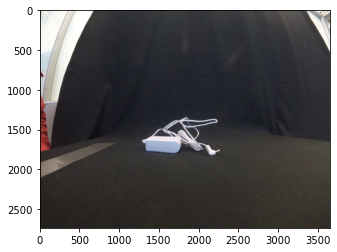

In [5]:
img = image.load_img('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/adaptor_1/adaptor_1.JPG')
plt.imshow(img)

In [6]:
cv2.imread("/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/adaptor_1/adaptor_1.JPG").shape

(2736, 3648, 3)

In [14]:
train = ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [38]:
train_dataset = train.flow_from_directory('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/',
                                         target_size = (227,227),
                                         batch_size = 30)

validation_dataset = validation.flow_from_directory('/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/RawData/',
                                         target_size = (227,227),
                                         batch_size = 30)

Found 828 images belonging to 414 classes.
Found 828 images belonging to 414 classes.


In [39]:
train_dataset.class_indices

{'CD_1': 0,
 'CD_2': 1,
 'CD_3': 2,
 'ChristmasCandy_1': 3,
 'ChristmasCandy_2': 4,
 'ChristmasCandy_3': 5,
 'NUbottle_1': 6,
 'NUbottle_2': 7,
 'NUbottle_3': 8,
 'adaptor_1': 9,
 'adaptor_2': 10,
 'adaptor_3': 11,
 'adaptor_4': 12,
 'antiitch_1': 13,
 'antiitch_2': 14,
 'antiitch_3': 15,
 'antiperspirant_1': 16,
 'antiperspirant_2': 17,
 'antiperspirant_3': 18,
 'apple_1': 19,
 'apple_2': 20,
 'apple_3': 21,
 'appleplug_1': 22,
 'appleplug_2': 23,
 'appleplug_3': 24,
 'appleplug_4': 25,
 'batteryCharger_1': 26,
 'batteryCharger_2': 27,
 'batteryCharger_3': 28,
 'batteryCharger_4': 29,
 'batteryCharger_5': 30,
 'batteryCharger_6': 31,
 'bigKnife_1': 32,
 'bigKnife_2': 33,
 'bigKnife_3': 34,
 'bigKnife_4': 35,
 'bigtape_1': 36,
 'bigtape_2': 37,
 'brush_1': 38,
 'brush_2': 39,
 'candle_1': 40,
 'candle_2': 41,
 'candle_3': 42,
 'cardpad_1': 43,
 'cardpad_2': 44,
 'cardpad_3': 45,
 'cardpad_4': 46,
 'cardpad_5': 47,
 'cleansingfoam_1': 48,
 'cleansingfoam_2': 49,
 'cleansingfoam_3': 50,


In [40]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (227,227,3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   #
                                   tf.keras.layers.Conv2D(16,(3,3),activation = 'relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   ##
                                   tf.keras.layers.Flatten(),
                                   ##
                                   tf.keras.layers.Dense(512,activation='relu'),
                                   ##
                                   tf.keras.layers.Dense(1,activation='sigmoid')
                                   ])

In [41]:
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [42]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 10,
                     epochs=4,
                     validation_data= validation_dataset)

Epoch 1/4
10/10 [==============================] - 77s 8s/step - loss: 0.0937 - accuracy: 0.9910 - val_loss: 0.0185 - val_accuracy: 0.9976
Epoch 2/4
10/10 [==============================] - 73s 8s/step - loss: 0.0195 - accuracy: 0.9976 - val_loss: 0.0181 - val_accuracy: 0.9976
Epoch 3/4
10/10 [==============================] - 75s 8s/step - loss: 0.0187 - accuracy: 0.9976 - val_loss: 0.0214 - val_accuracy: 0.9976
Epoch 4/4
10/10 [==============================] - 74s 8s/step - loss: 0.0196 - accuracy: 0.9976 - val_loss: 0.0207 - val_accuracy: 0.9976


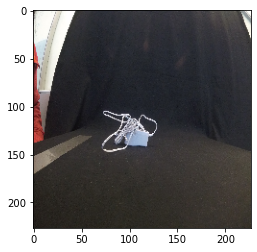

[[0.]]


In [47]:
dir_path = '/home/srikanth/Downloads/Dataset_20181026/Dataset_20181026/Test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//' + i, target_size = (227,227))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)

In [16]:
# AlexNet

image_shape = (227, 227, 3)
model = Sequential()

# 1st convolutional layer: 96 filters
model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))

# max pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 2nd convolutional layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# max pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 3rd convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 4th convolutional layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# 5th convolutional layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))

# max pooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# pass to fully connected layer, after flattening
model.add(Flatten())

# 1st FCL
model.add(Dense(4096, input_shape=(227*227*3,)))
model.add(Activation('relu'))
# dropout to prevent overfitting
model.add(Dropout(0.4))

# 2nd FCL
model.add(Dense(4096))
model.add(Activation('relu'))
# dropout to prevent overfitting
model.add(Dropout(0.4))

# output layer
model.add(Dense(1000))
model.add(Activation('softmax'))

model.summary()

# compiling model
model.compile(loss = keras.losses.categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 activation_6 (Activation)   (None, 55, 55, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 activation_7 (Activation)   (None, 23, 23, 256)       0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                  